In [80]:
import os
import glob
import sys
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
path_to_run = "../data/run-2022-03-07T13:37:43+02:00"

In [51]:
raw_mutspecs = dict()
for outdir in os.listdir(path_to_run):
    path = os.path.join(path_to_run, outdir)
    files = os.listdir(path)
    if len(files) != 0:
        mspath = os.path.join(path, "mut_spec.json")
        assert os.path.exists(mspath)
        with open(mspath) as handle:
            spectra = json.load(handle)
            raw_mutspecs[outdir] = spectra

In [73]:
mutspecs_lst = []
for outdir, rms in raw_mutspecs.items():
    for idx, muts in rms.items():
        muts["idx"] = int(idx)
        muts["out"] = outdir
        mutspecs_lst.append(muts)

mutspecs = pd.DataFrame(mutspecs_lst)

cols_id = ["idx", "out"]
cols_mut = list(mutspecs.columns.drop(cols_id).sort_values())
mutspecs = mutspecs[cols_id + cols_mut]

mutspecs.head()

,idx,out,aAa>aCa,aAa>aGa,aAa>aTa,aAc>aCc,aAc>aGc,aAc>aTc,aAg>aCg,aAg>aGg,...,tTa>tGa,tTc>tAc,tTc>tCc,tTc>tGc,tTg>tAg,tTg>tCg,tTg>tGg,tTt>tAt,tTt>tCt,tTt>tGt
0,7,output_12187,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.035736,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,1,output_12189,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.400000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,2,output_12189,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.008036,0.0,0.000000,0.0
3,8,output_12189,0.0,0.002321,0.0,0.0,0.0,0.0,0.0,0.003868,...,0.0,0.000000,0.000000,0.0,0.000000,0.003315,0.000000,0.0,0.058013,0.0
4,4,output_12181,0.0,0.008076,0.0,0.0,0.0,0.0,0.0,0.040380,...,0.0,0.011249,0.032708,0.0,0.000865,0.009361,0.000433,0.0,0.022301,0.0


In [95]:
mutspecs.shape

(16, 194)

In [79]:
melted = mutspecs.melt(id_vars=cols_id, value_vars=cols_mut)
melted.head()

,idx,out,variable,value
0,7,output_12187,aAa>aCa,0.0
1,1,output_12189,aAa>aCa,0.0
2,2,output_12189,aAa>aCa,0.0
3,8,output_12189,aAa>aCa,0.0
4,4,output_12181,aAa>aCa,0.0


## Example mutscpecs 
X asis is mutations: yX<sub>1</sub>z>yX<sub>2</sub>z

MOTSTER was runned on 10 files (10 sequences in each). We expected 100 resulting mutspecs, but for many sequences there are no appropriate number of similar seqs (at least 10) according to blast. Also for one file there was error and we have no result for 10 sequences from this file. 

Here there are 16 mutspecs. Not all mutspec are suitable for analysis

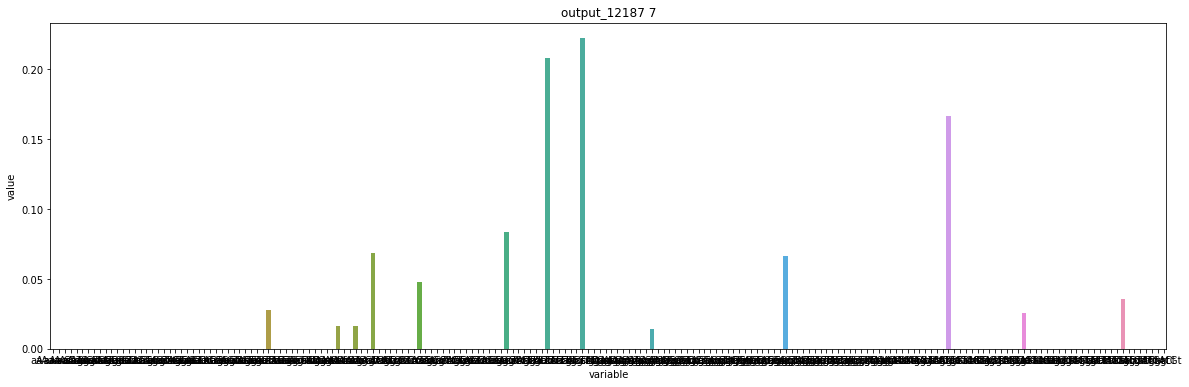

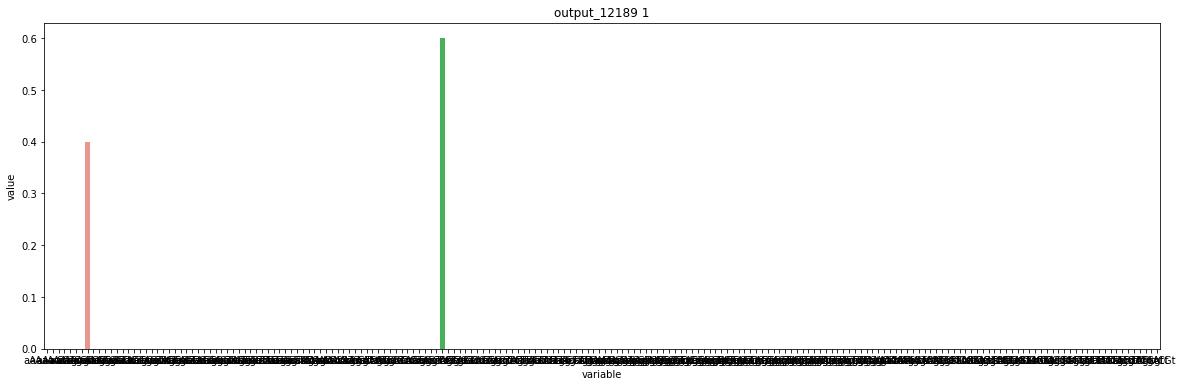

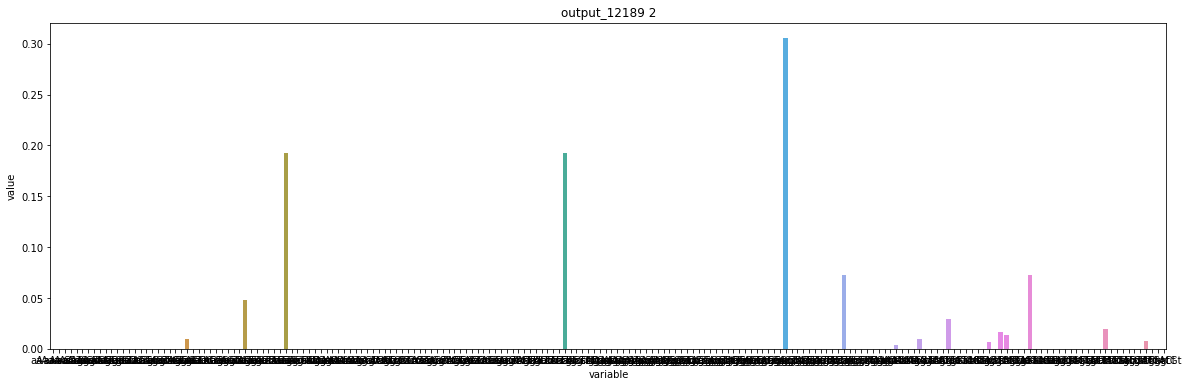

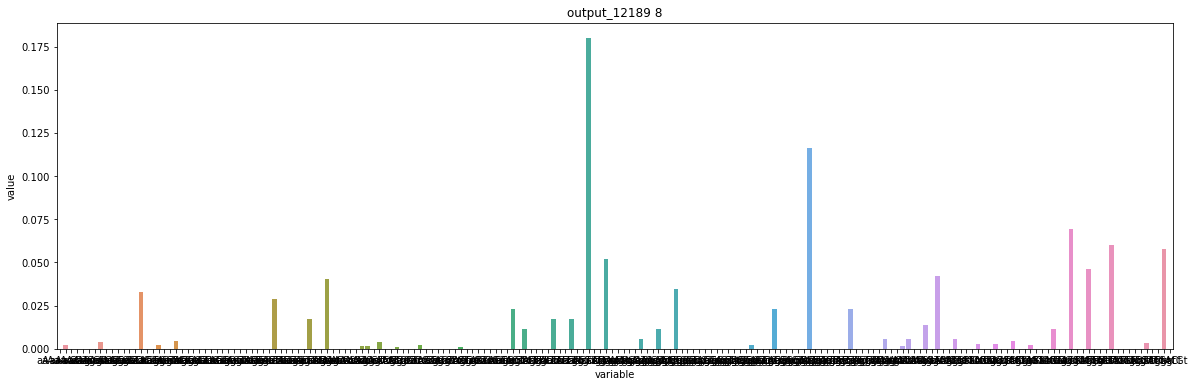

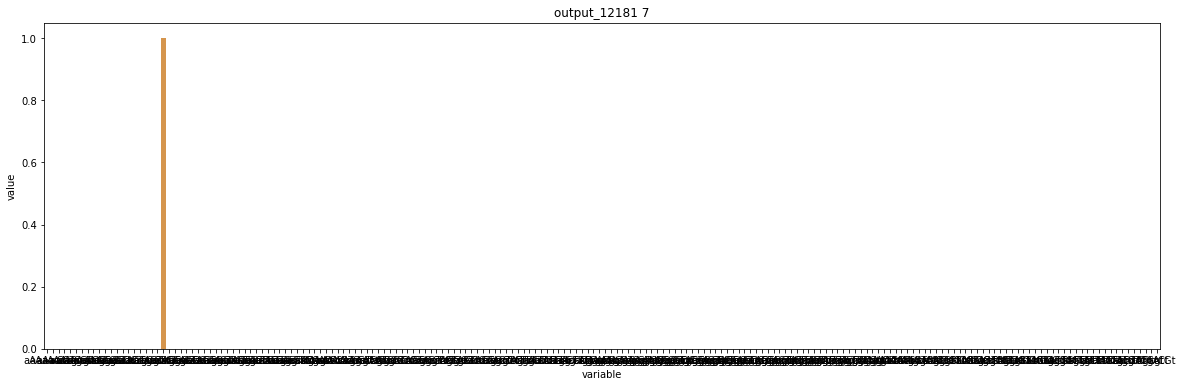

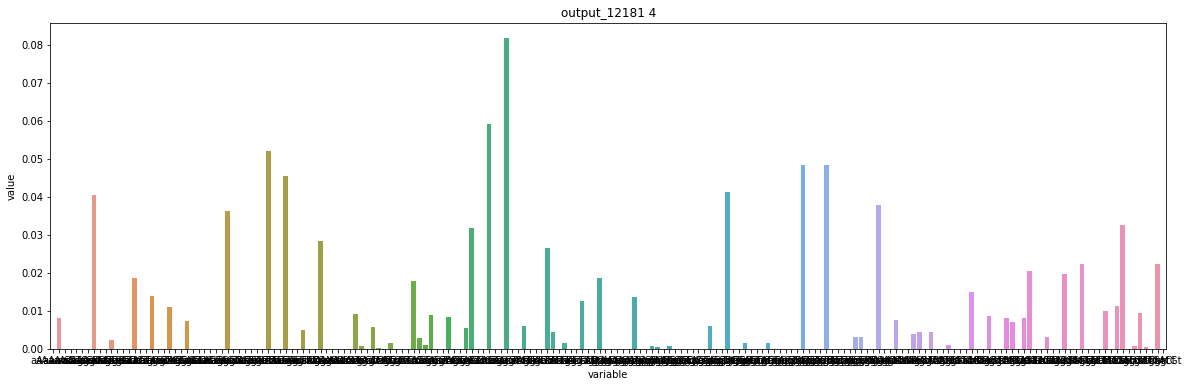

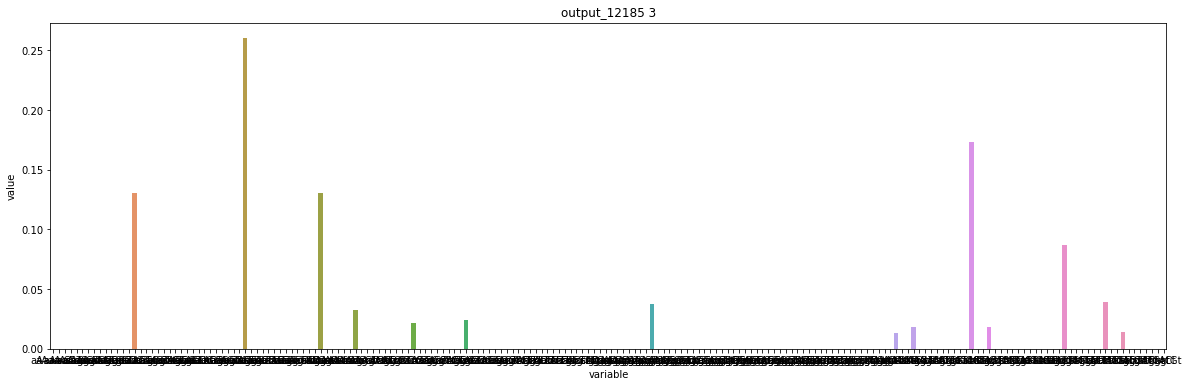

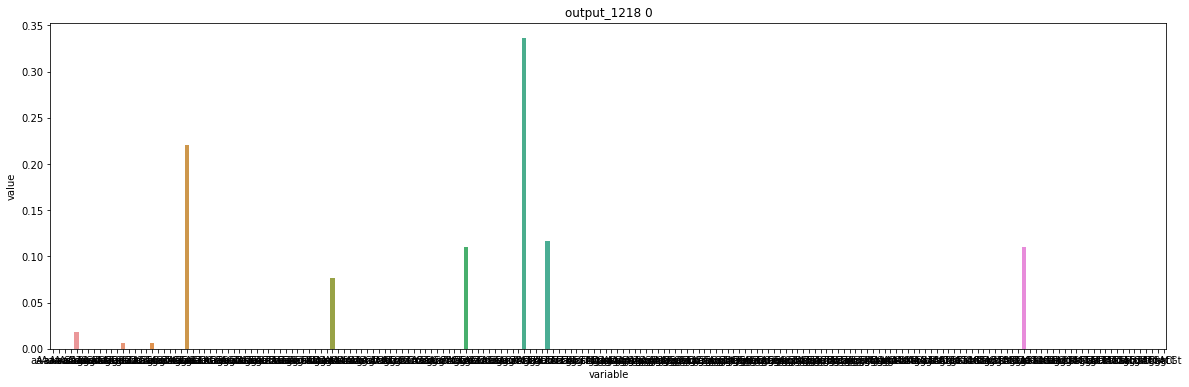

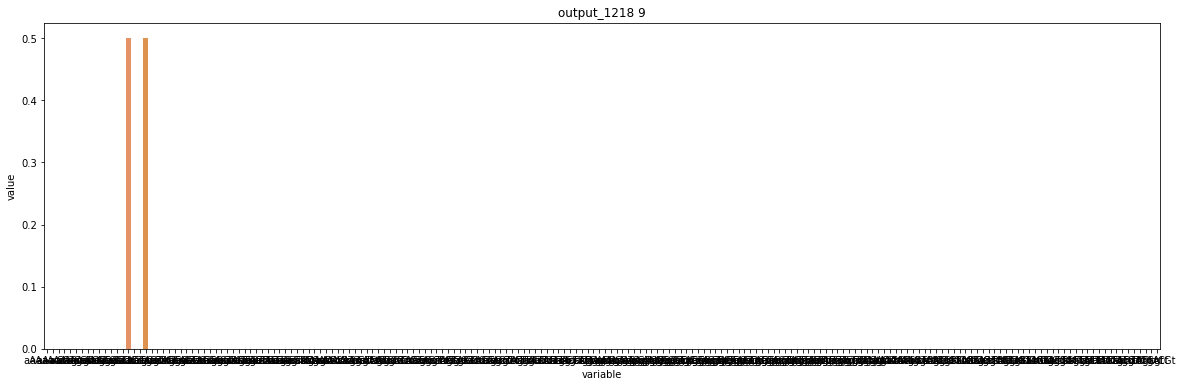

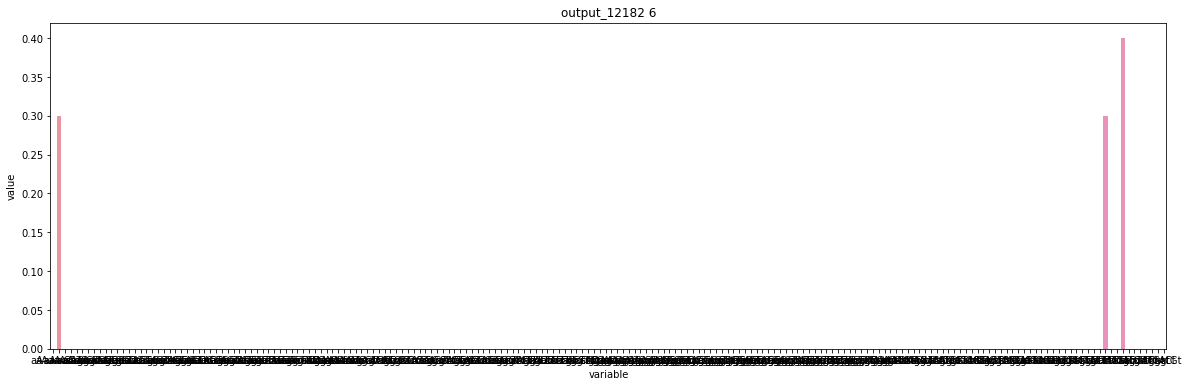

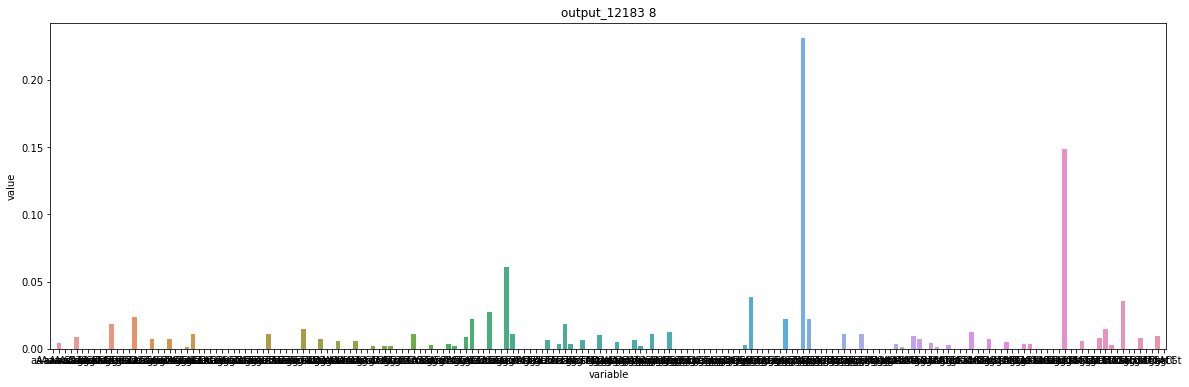

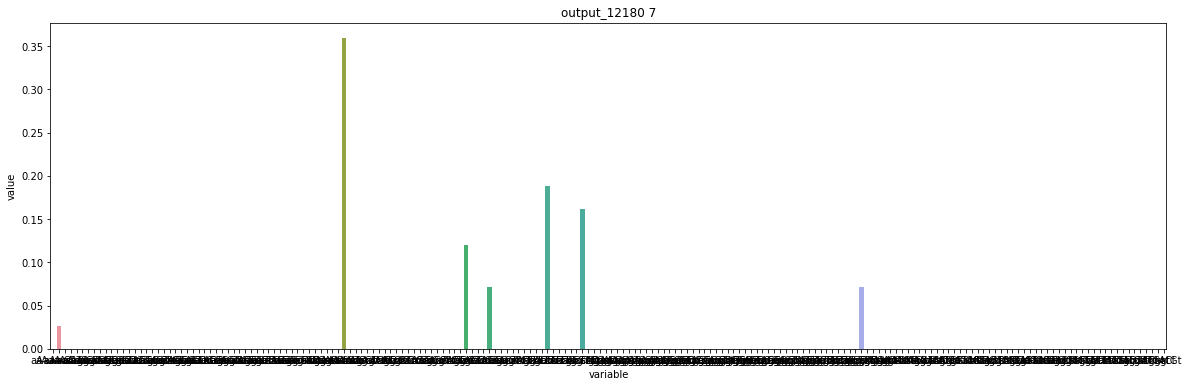

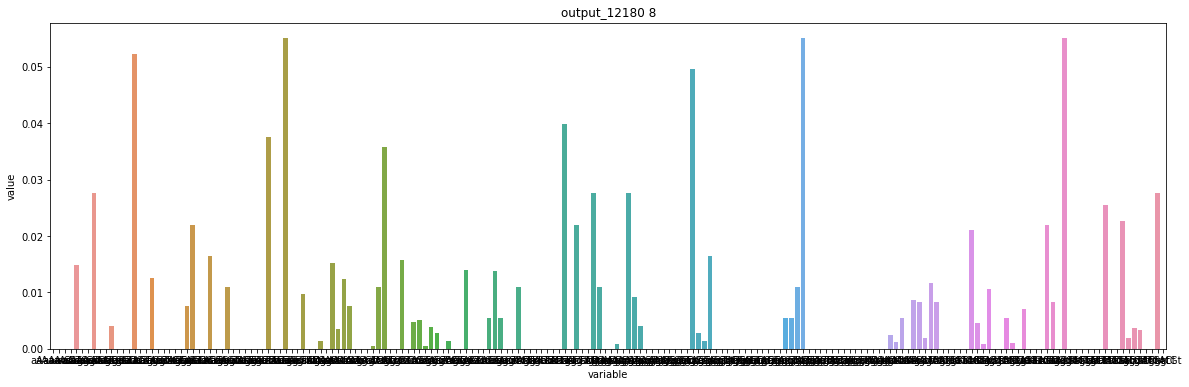

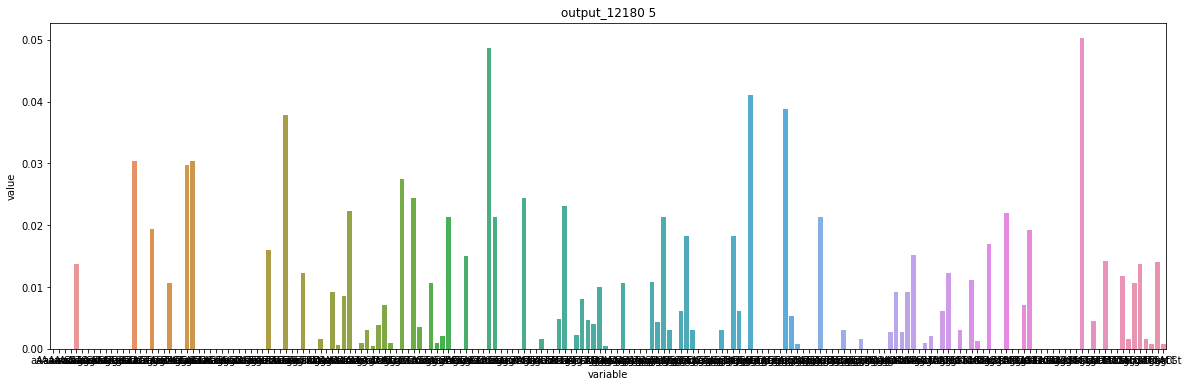

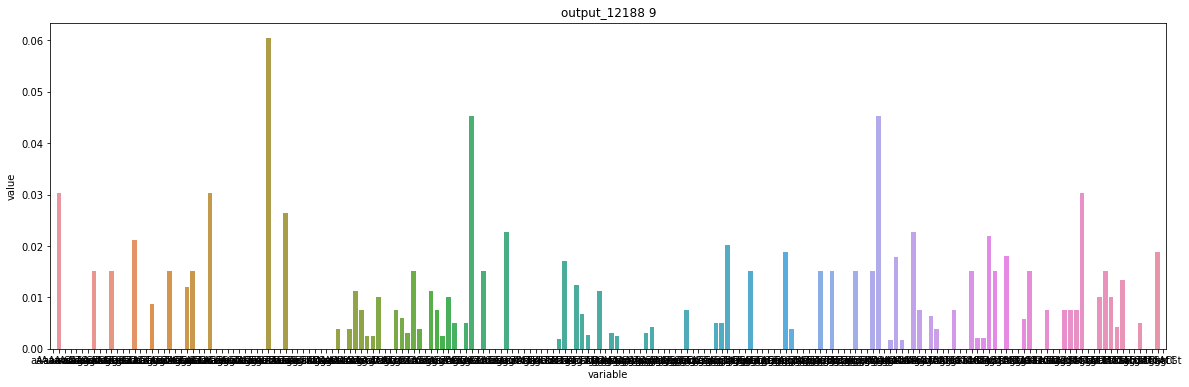

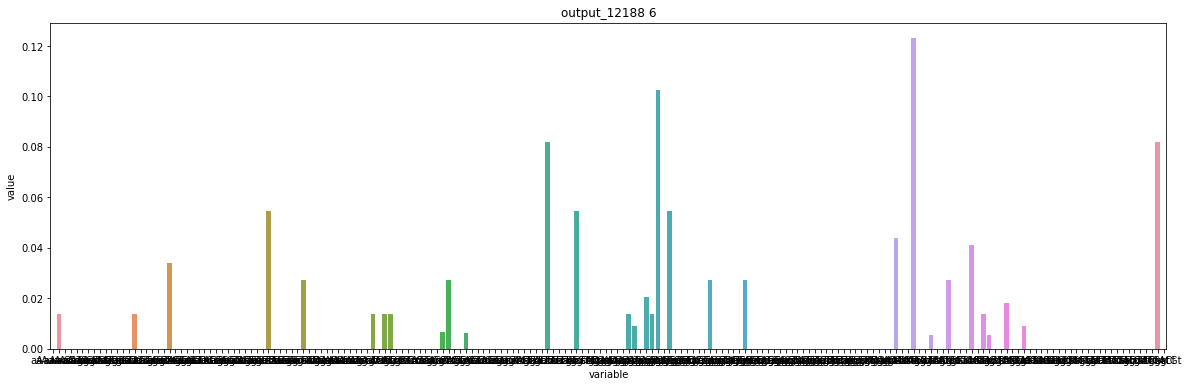

In [94]:
for _out in melted.out.unique():
    for _idx in melted.idx.unique():
        df = melted[(melted["idx"] == _idx) & (melted["out"] == _out)]
        if len(df) == 0:
            continue
        
        plt.figure(figsize=(20, 6))
        sns.barplot(x="variable", y="value", data=df)
        plt.title(f"{_out} {_idx}")
        plt.show()